# HW#3 stock auto linear regression

## step1 讀入訓練、測試資料

In [31]:
import pandas as pd

data = pd.read_csv("2327_training.csv")
test = pd.read_csv("2327_testing.csv")
# data = pd.read_csv("0056_training.csv")
# test = pd.read_csv("0056_testing.csv")
# data = pd.read_csv("2317_training.csv")
# test = pd.read_csv("2317_testing.csv")


## step2 擷取出 features 和 label
- X 為 features（`y` 欄位）
- y 為 label（去掉最後一欄）

In [32]:
y = data['y'].values.reshape(-1,1)
X = data[data.columns[:-1]].values

# print(X.shape)
# print(y.shape)


## step3 訓練 linear regression model
linear regression model帶入訓練資料


In [33]:
from sklearn.linear_model import LinearRegression as LR

model = LR()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## step4 評估模型和預測價格
1. 評估 mse 和 r2 score 
2. 用訓練好的 model 預測 testing data 的 label

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

preY_train = model.predict(X)
print('train:')
print('mse=',mean_squared_error(preY_train,y))
print('r2=',r2_score(preY_train,y))


# print(test[test.columns[:-1]].shape)
preY_test = model.predict(test[test.columns[:-1]])
# print(preY_test.shape)
y_test = test[test.columns[-1]]
print('\ntest:')
print('mse=',mean_squared_error(preY_test,y_test))
print('r2=',r2_score(preY_test,y_test))




train:
mse= 88.06855320004746
r2= 0.8732636282326625

test:
mse= 9.389971525304135
r2= 0.35973737226979674



## step4 畫出實際值與預測值折線圖

圖表顯示未來10天的實際值和預測值
#### 圖表x軸會依據testing的資料筆數變動


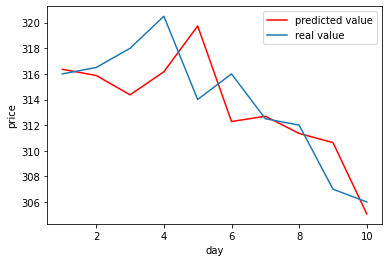

In [35]:
import matplotlib.pyplot as plt


day = [i+1 for i in range(0, test.shape[0])]
plt.plot(day, preY_test, color='red', label='predicted value')
plt.plot(day, test[test.columns[-1]], label='real value')
plt.legend()
plt.xlabel('day')
plt.ylabel('price')
plt.show()
